<a href="https://colab.research.google.com/github/manuuC3368/CodeLab_BI/blob/main/MANCAS_BASEDEDATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install faker  # Install the faker module


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.6 MB/s eta 0:00:00


In [17]:
import sqlite3
import pandas as pd
import requests
import random
import uuid
from faker import Faker
import numpy as np
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
import missingno as msno

In [4]:
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
importar_carpeta = '/content/drive/MyDrive/sources/financial_data (1).db'

conectar = sqlite3.connect(importar_carpeta)

df = pd.read_sql_query("SELECT * FROM tbl_customers LIMIT 10", conectar)

conectar.close()

In [8]:
conectar = sqlite3.connect(importar_carpeta)
df = pd.read_sql_query("SELECT * FROM tbl_corrected_transactions LIMIT 10", conectar)
conectar.close()
print(df)

                         transaction_id                           customer_id  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  92cd15bb-6a66-45a2-af38-3b28392d920f   
1  23b8c1e9-3924-46de-beb1-3b9046685257  64161b8e-14dc-4621-aafc-46918171e098   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9  59a3161f-06d8-4904-9991-15c0a9a0f0c8   
3  972a8469-1641-4f82-8b9d-2434e465e150  81e0d564-ec48-4a38-a19e-a0fdab261102   
4  17fc695a-07a0-4a6e-8822-e8f36c031199  f9639bd0-6dcd-4633-a67a-1e816a62afbc   
5  9a1de644-815e-46d1-bb8f-aa1837f8a88b  fc2bfb2f-0fb8-463a-920d-a3cb744d39e4   
6  b74d0fb1-32e7-4629-8fad-c1a606cb0fb3  7646d1f8-e3f2-4feb-b637-b9e0d8de8aeb   
7  6b65a6a4-8b81-48f6-b38a-088ca65ed389  8a6552ba-d1ed-4fe8-a304-fb78e5498740   
8  47378190-96da-4dac-b2ff-5d2a386ecbe0  79190580-f636-436c-8f0e-becc5c0ac927   
9  c241330b-01a9-471f-9e8a-774bcf36d58b  a1945f19-aadc-4103-ba78-190a6146502b   

   transaction_date  transaction_amount transaction_location transaction_type  \
0  15/02/2024 15:19        

In [9]:
# Conectar a la base de datos
conectar = sqlite3.connect(importar_carpeta)

# Lista de tablas en la base de datos
tablas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conectar)

# Cerrar la conexión
conectar.close()
print(tablas)

                         name
0  tbl_corrected_transactions
1               tbl_customers
2                tbl_branches


#INFORME DE COMPLETITUD

Conexión a la base de datos exitosa.
Datos leídos exitosamente.


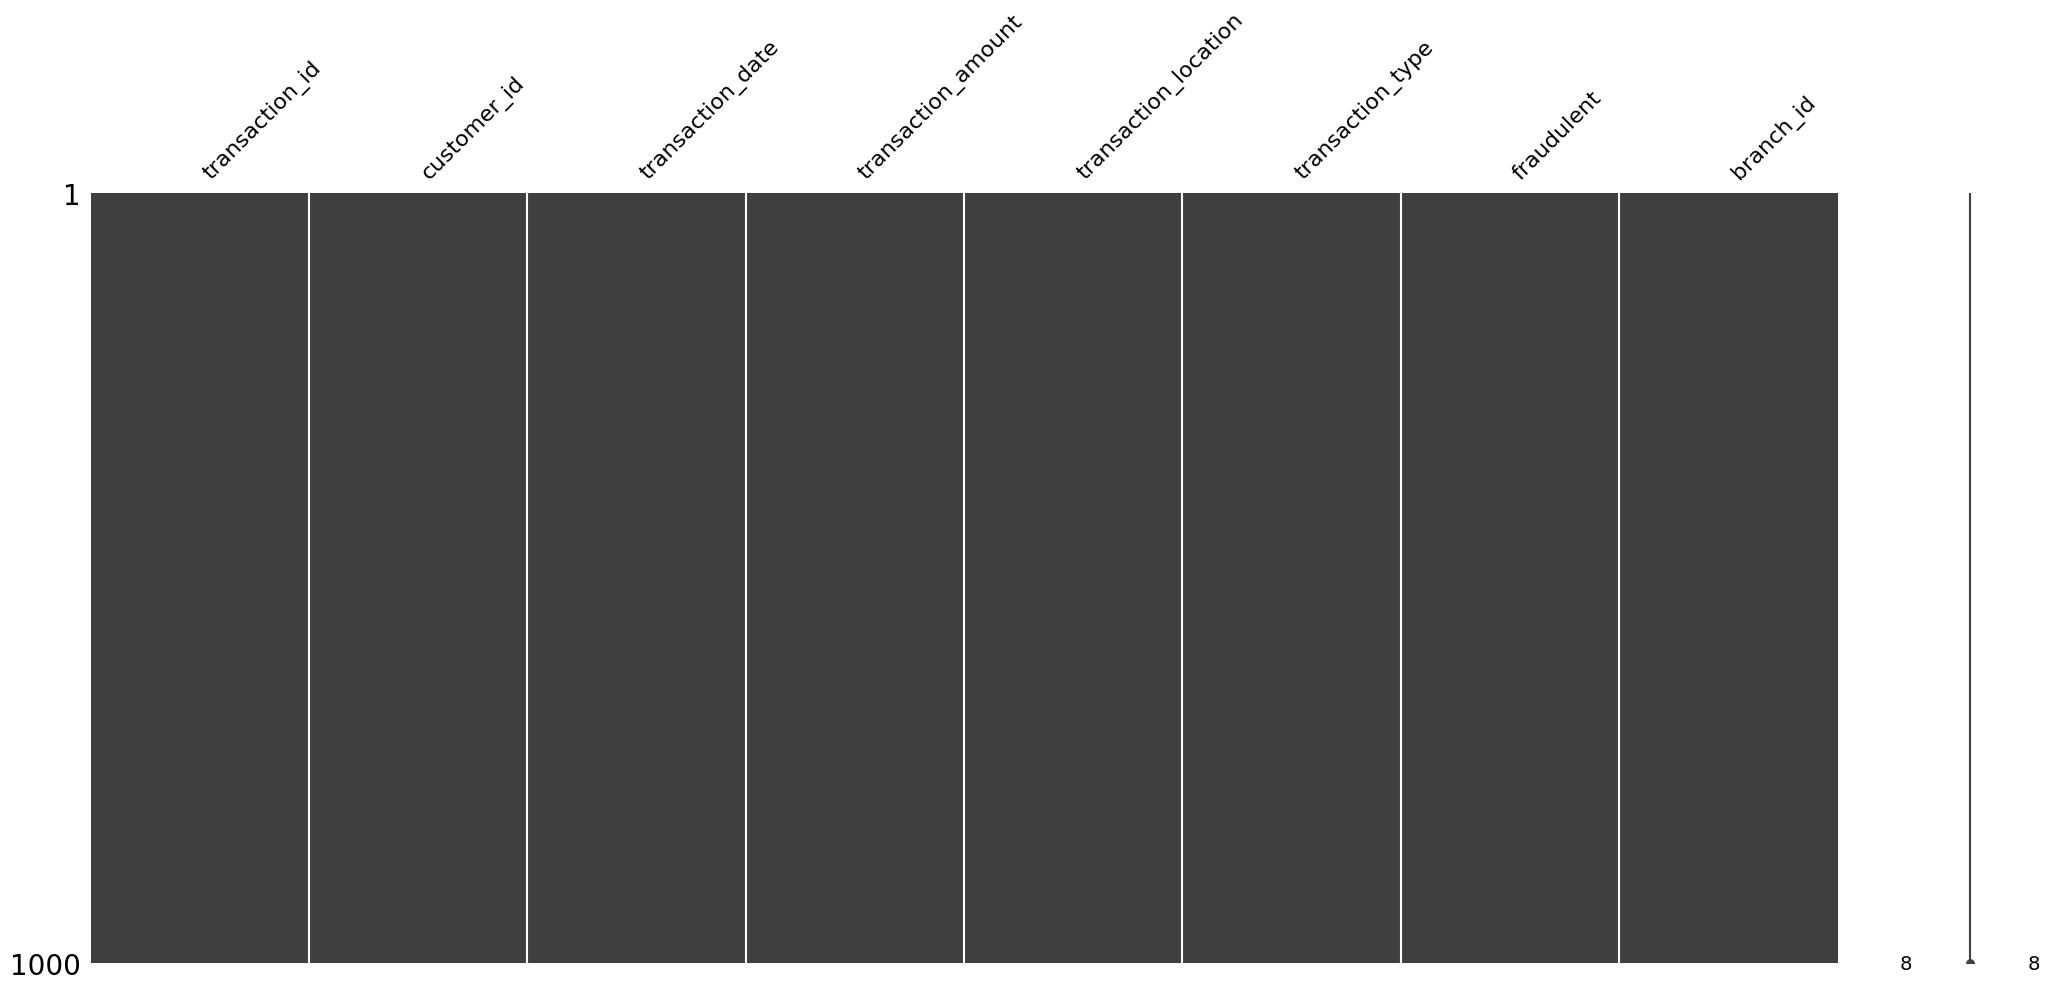

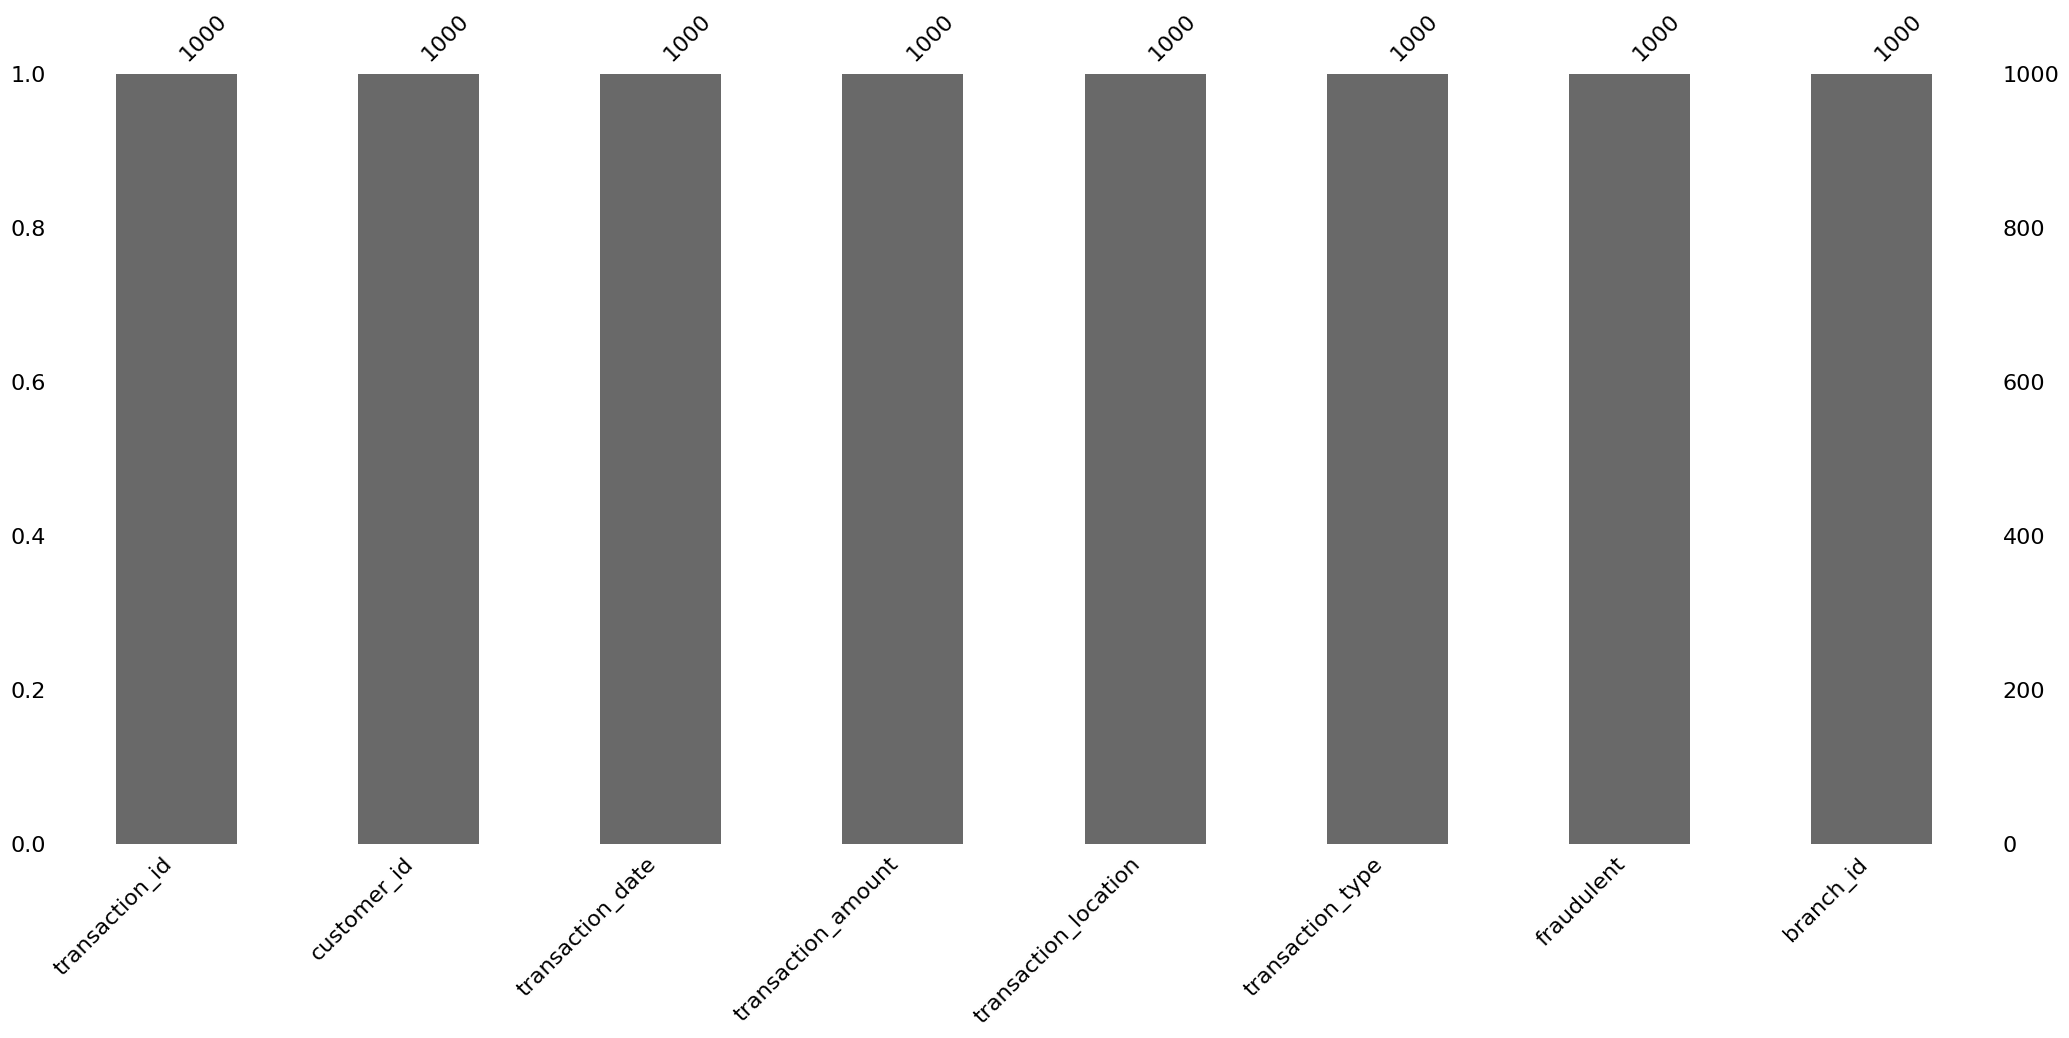

Conexión a la base de datos cerrada.


In [15]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/sources/financial_data (1).db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla en un DataFrame
try:
    df = pd.read_sql_query("SELECT * FROM tbl_corrected_transactions", conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Visualización de completitud usando missingno
msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

# Cerrar la conexión
conn.close()
print("Conexión a la base de datos cerrada.")

Conexión a la base de datos exitosa.
Datos leídos exitosamente.


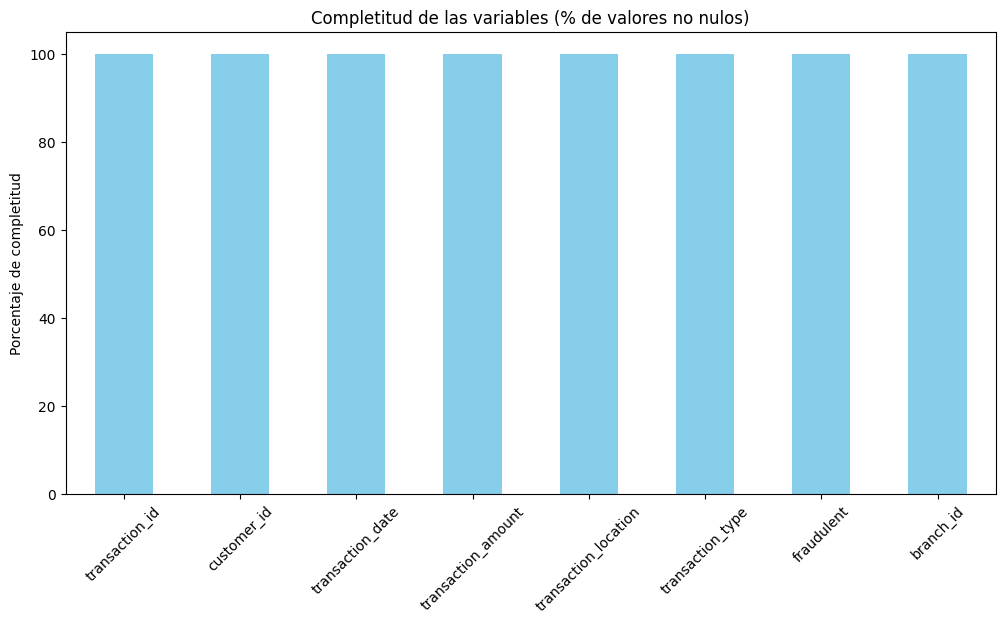

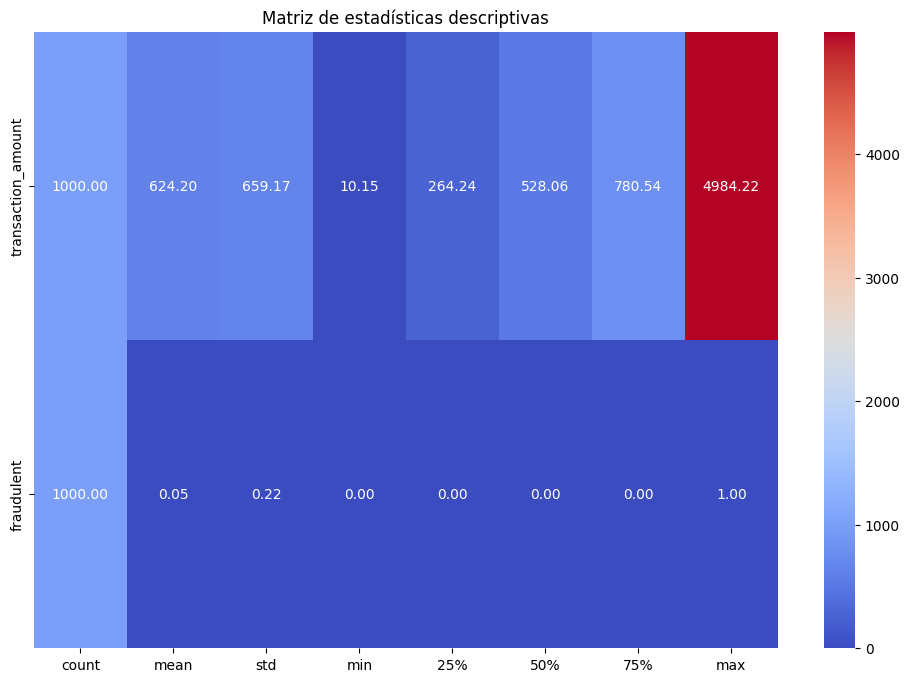

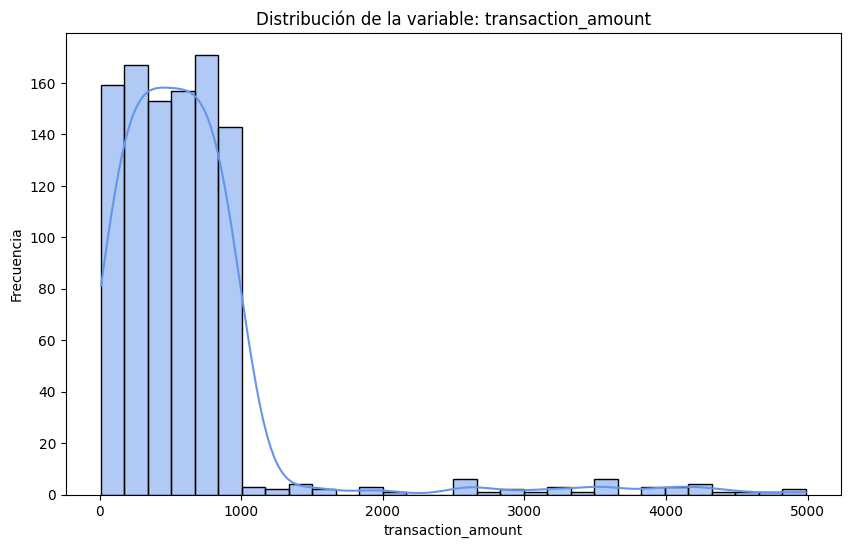

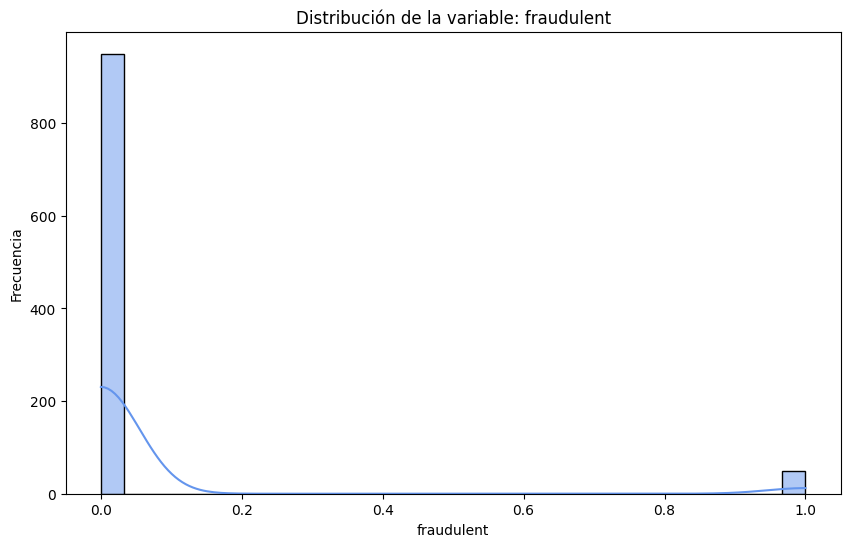

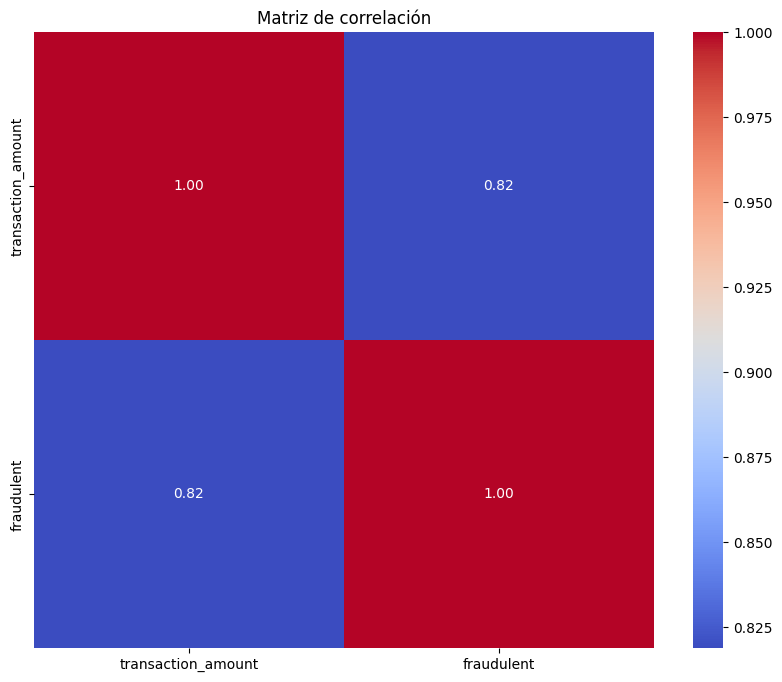

Conexión a la base de datos cerrada.


In [18]:
# 1. Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/sources/financial_data (1).db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# 2. Leer la tabla 'db_temp_Azure_vw_CLIENTES' en un DataFrame
try:
    df = pd.read_sql_query("SELECT * FROM tbl_corrected_transactions", conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# 3. Verificación de completitud y visualización gráfica
completitud = df.notnull().mean() * 100
completitud.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Completitud de las variables (% de valores no nulos)')
plt.ylabel('Porcentaje de completitud')
plt.xticks(rotation=45)
plt.show()

# 4. Estadísticas descriptivas para variables numéricas y visualización de la matriz
estadisticas_descriptivas = df.describe().transpose()
plt.figure(figsize=(12, 8))
sns.heatmap(estadisticas_descriptivas, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de estadísticas descriptivas')
plt.show()

# 5. Distribución de las variables numéricas
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

for var in variables_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var].dropna(), kde=True, bins=30, color='cornflowerblue')
    plt.title(f'Distribución de la variable: {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

# 6. Matriz de correlación para variables numéricas
plt.figure(figsize=(10, 8))
correlacion = df[variables_numericas].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

# 7. Cerrar la conexión a la base de datos
conn.close()
print("Conexión a la base de datos cerrada.")


                              transaction_id  \
count                                   1000   
unique                                  1000   
top     bdd640fb-0667-4ad1-9c80-317fa3b1799d   
freq                                       1   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

                                 customer_id transaction_date  \
count                                   1000             1000   
unique                                   430              999   
top     4bf8c414-cd87-49f0-8632-07cf60b6c27e  12/04/2024 6:35   
freq                                       7                2   
mean                                     NaN              NaN   
std                              

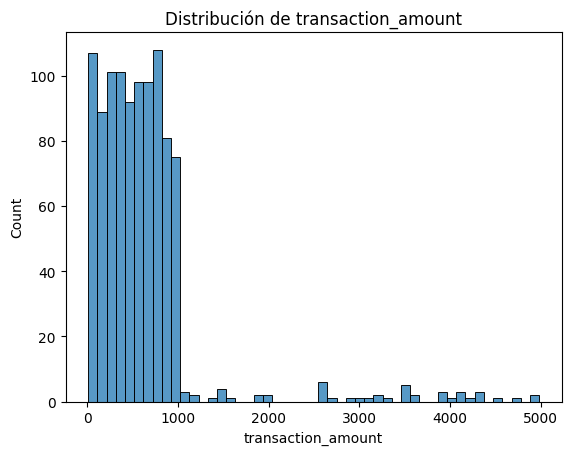

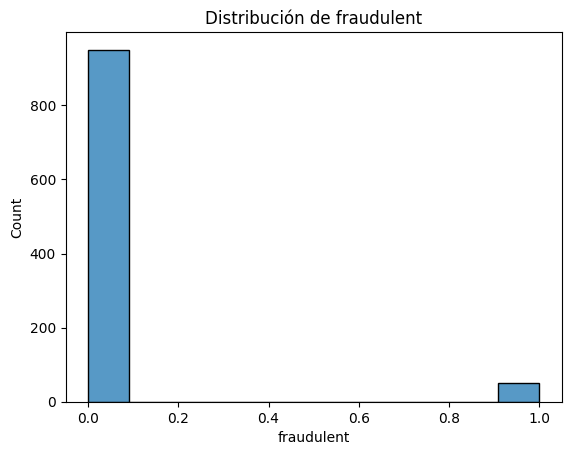

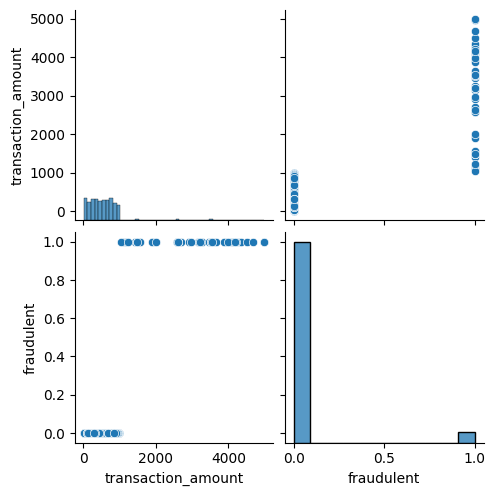

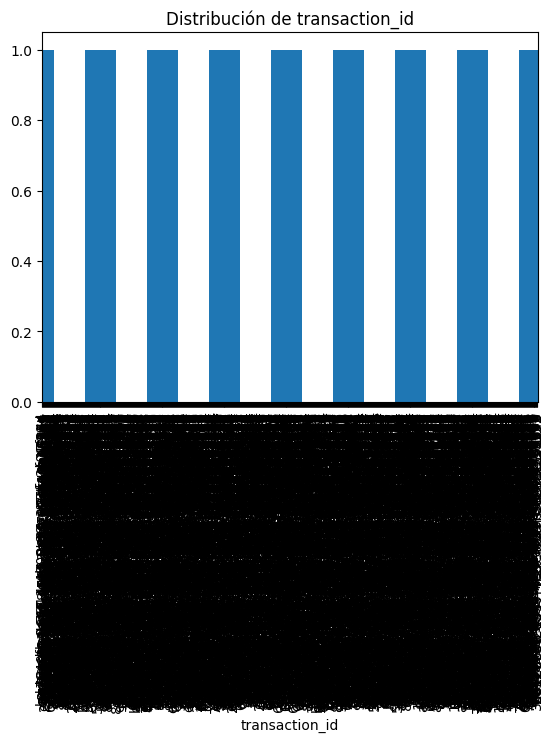

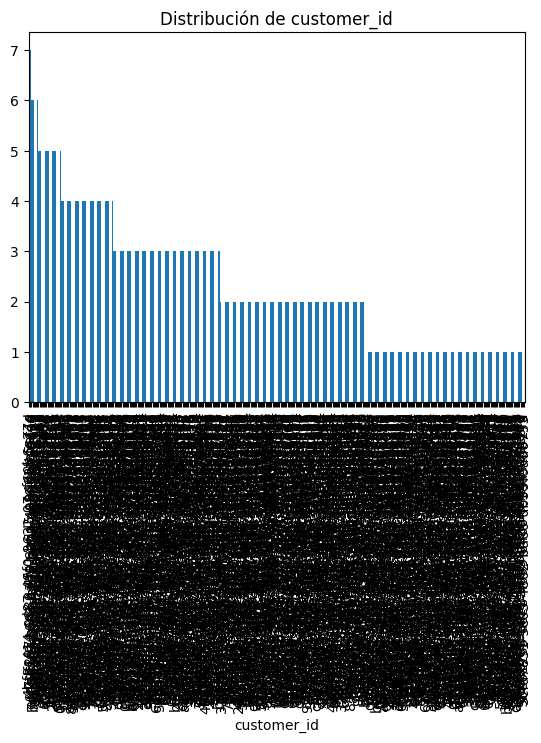

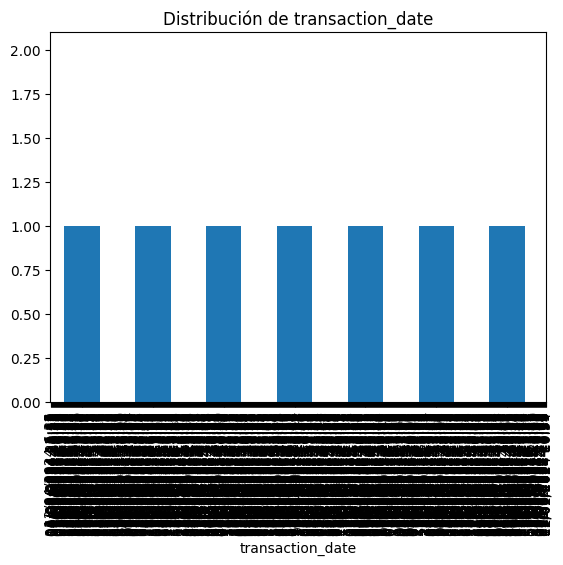

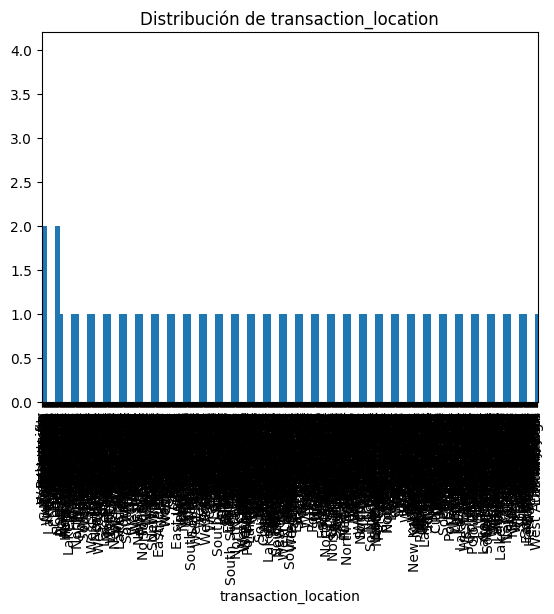

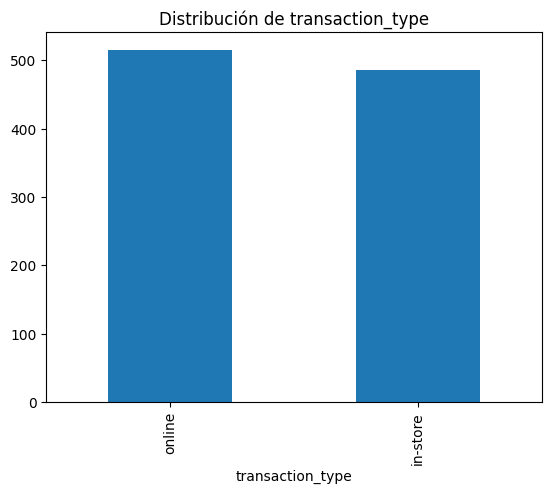

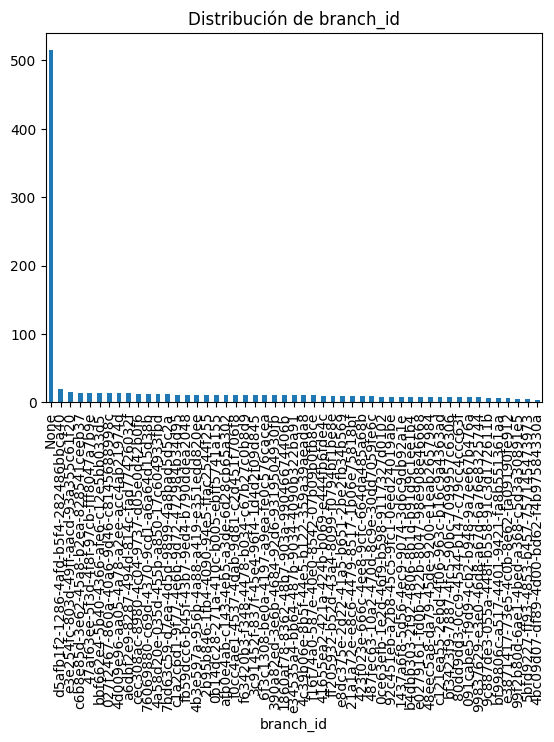

transaction_id          0
customer_id             0
transaction_date        0
transaction_amount      0
transaction_location    0
transaction_type        0
fraudulent              0
branch_id               0
dtype: int64


In [19]:
# prompt: dame un script que me ayude hacer un EDA a las tablas de mi base de datos.

import matplotlib.pyplot as plt
import seaborn as sns

# Reemplaza 'nombre_de_tu_tabla' con el nombre real de la tabla que quieres analizar
conectar = sqlite3.connect(importar_carpeta)
df = pd.read_sql_query("SELECT * FROM tbl_corrected_transactions", conectar)
conectar.close()

# Resumen estadístico
print(df.describe(include='all'))

# Información sobre el DataFrame
print(df.info())

# Visualización de la distribución de variables numéricas
for col in df.select_dtypes(include=['number']):
    plt.figure()
    sns.histplot(df[col])
    plt.title(f'Distribución de {col}')
    plt.show()

# Visualización de la relación entre variables numéricas
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

# Visualización de variables categóricas
for col in df.select_dtypes(include=['object']):
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.show()

# Detección de valores faltantes
print(df.isnull().sum())

# Puedes añadir más análisis según tus necesidades, como:
# - Correlación entre variables
# - Detección de outliers
# - Análisis de series temporales (si aplica)


In [20]:
# Inicializar Faker
fake = Faker()

# Crear la conexión a la base de datos SQLite3
conn = sqlite3.connect('financial_data.db')

# Función para ejecutar consultas SQL
def execute_query(query, conn):
    with conn:
        conn.execute(query)

# Crear las tablas en SQLite3
execute_query('''CREATE TABLE IF NOT EXISTS customers (
                 customer_id TEXT PRIMARY KEY,
                 name TEXT,
                 address TEXT,
                 phone_number TEXT,
                 email TEXT);''', conn)

execute_query('''CREATE TABLE IF NOT EXISTS branches (
                 branch_id TEXT PRIMARY KEY,
                 branch_location TEXT,
                 manager_name TEXT,
                 contact_number TEXT);''', conn)

execute_query('''CREATE TABLE IF NOT EXISTS transaction_types (
                 transaction_type TEXT PRIMARY KEY,
                 description TEXT);''', conn)

execute_query('''CREATE TABLE IF NOT EXISTS transactions (
                 transaction_id TEXT PRIMARY KEY,
                 customer_id TEXT,
                 transaction_date TEXT,
                 transaction_amount REAL,
                 transaction_location TEXT,
                 transaction_type TEXT,
                 fraudulent INTEGER,
                 branch_id TEXT,
                 FOREIGN KEY(customer_id) REFERENCES customers(customer_id),
                 FOREIGN KEY(transaction_type) REFERENCES transaction_types(transaction_type),
                 FOREIGN KEY(branch_id) REFERENCES branches(branch_id));''', conn)

In [21]:
# Función para obtener datos de clientes desde randomuser API
def get_random_users(num_users=300):
    url = f"https://randomuser.me/api/?results={num_users}&nat=us"
    response = requests.get(url)
    if response.status_code == 200:
        users = response.json()['results']
        return users
    else:
        print("Error fetching data from randomuser.me")
        return []

# Crear la tabla de clientes y guardarla en SQLite3
def create_customers_table(num_customers=300):
    users = get_random_users(num_customers)
    customers_data = {
        "customer_id": [str(uuid.uuid4()) for _ in range(num_customers)],
        "name": [f"{user['name']['first']} {user['name']['last']}" for user in users],
        "address": [f"{user['location']['street']['number']} {user['location']['street']['name']}, {user['location']['city']}, {user['location']['state']}, {user['location']['postcode']}" for user in users],
        "phone_number": [user['phone'] for user in users],
        "email": [user['email'] for user in users]
    }
    customers_df = pd.DataFrame(customers_data)
    customers_df.to_sql('customers', conn, if_exists='replace', index=False)
    return customers_df

# Crear la tabla de clientes
customers_df = create_customers_table(num_customers=100)

In [22]:
# Crear la tabla de sucursales y guardarla en SQLite3
def create_branches_table(num_branches=10):
    branch_data = {
        "branch_id": [str(uuid.uuid4()) for _ in range(num_branches)],
        "branch_location": [fake.city() for _ in range(num_branches)],
        "manager_name": [fake.name() for _ in range(num_branches)],
        "contact_number": [fake.phone_number() for _ in range(num_branches)]
    }
    branches_df = pd.DataFrame(branch_data)
    branches_df.to_sql('branches', conn, if_exists='replace', index=False)
    return branches_df

# Crear la tabla de sucursales
branches_df = create_branches_table(num_branches=20)

In [23]:
# Crear la tabla de tipos de transacciones y guardarla en SQLite3
def create_transaction_types_table():
    transaction_types_data = {
        "transaction_type": ["online", "in-store"],
        "description": ["Transaction made online via the internet",
                        "Transaction made at a physical store location"]
    }
    transaction_types_df = pd.DataFrame(transaction_types_data)
    transaction_types_df.to_sql('transaction_types', conn, if_exists='replace', index=False)
    return transaction_types_df

# Crear la tabla de tipos de transacciones
transaction_types_df = create_transaction_types_table()

In [24]:
# Crear la tabla de transacciones y guardarla en SQLite3
def create_transactions_table(customers_df, branches_df, num_transactions=1000):
    transaction_data = {
        "transaction_id": [str(uuid.uuid4()) for _ in range(num_transactions)],
        "customer_id": [random.choice(customers_df['customer_id']) for _ in range(num_transactions)],
        "transaction_date": [fake.date_time_this_year().isoformat() for _ in range(num_transactions)],
        "transaction_amount": [round(random.uniform(10.0, 1000.0), 2) for _ in range(num_transactions)],
        "transaction_location": [fake.city() for _ in range(num_transactions)],
        "transaction_type": [random.choice(["online", "in-store"]) for _ in range(num_transactions)],
        "fraudulent": [0] * num_transactions
    }
    transactions_df = pd.DataFrame(transaction_data)

    # Introducir transacciones fraudulentas
    n_fraud = 10  # Número de transacciones fraudulentas
    fraud_indices = np.random.choice(transactions_df.index, n_fraud, replace=False)
    transactions_df.loc[fraud_indices, 'fraudulent'] = 1
    transactions_df.loc[fraud_indices, 'transaction_amount'] = [round(random.uniform(1000.0, 5000.0), 2) for _ in range(n_fraud)]
    transactions_df.loc[fraud_indices, 'transaction_type'] = "online"

    # Asignar branch_id solo para transacciones "in-store"
    in_store_indices = transactions_df[transactions_df['transaction_type'] == 'in-store'].index
    transactions_df.loc[in_store_indices, 'branch_id'] = np.random.choice(branches_df['branch_id'], size=len(in_store_indices))

    # Para transacciones online, branch_id se puede establecer en None
    transactions_df['branch_id'].fillna('None', inplace=True)

    transactions_df.to_sql('transactions', conn, if_exists='replace', index=False)
    return transactions_df

# Crear la tabla de transacciones
transactions_df = create_transactions_table(customers_df, branches_df, num_transactions=500)

In [25]:
# Verificar la creación de tablas en SQLite3
print("Tablas en la base de datos SQLite:")
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print(tables)

# Cerrar la conexión
conn.close()

Tablas en la base de datos SQLite:
                name
0          customers
1           branches
2  transaction_types
3       transactions


In [26]:
# Ruta en Google Drive donde deseas guardar la base de datos
drive_db_path = '/content/drive/My Drive/financial_data.db'

# Copiar el archivo de la base de datos a Google Drive
shutil.copy('financial_data.db', drive_db_path)

print(f'Base de datos guardada en: {drive_db_path}')

Base de datos guardada en: /content/drive/My Drive/financial_data.db
